# Model and Forecast- Prophet

In [ ]:
# Import libraries
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Roboto_Condensed_Bold

# Load in data
data = pd.read_csv("cleaned_data.csv")
data.head()

,Report Date,Fish Kills
0,2000-03-31,22
1,2000-04-30,10
2,2000-05-31,53
3,2000-06-30,22
4,2000-07-31,27


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1008x504 with 0 Axes>

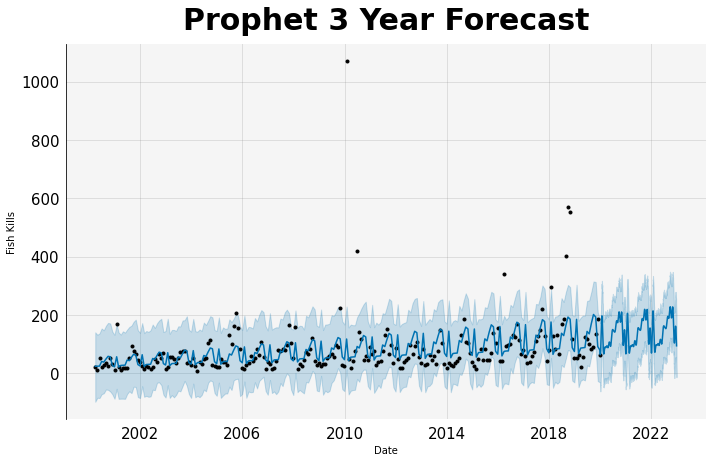

<Figure size 1008x504 with 0 Axes>

In [ ]:
# Rename Data Columns
data = data.rename(columns= {'Report Date': 'ds', 'Fish Kills': 'y'})
# Create Prophet model
m = Prophet(seasonality_mode='multiplicative').fit(data)
# Forecast for three years in the future
future = m.make_future_dataframe(periods=1095)
# Make predictions
fcst = m.predict(future)
# Plot predictions
fig = m.plot(fcst)
plt.title("Prophet 3 Year Forecast")
plt.ylabel("Fish Kills")
plt.xlabel("Date")
plt.figure(figsize=(14,7))

In [54]:
# Calculate RMSE
y_true = data['y']
y_pred = fcst['yhat']
RMSE = np.sqrt(np.mean((y_true - y_pred)**2))
print("RMSE: {}".format(RMSE))

RMSE: 87.60246929249605
